In [1]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [2]:
!kaggle datasets download -d chitwanmanchanda/fraudulent-transactions-data

fraudulent-transactions-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
!unzip /content/fraudulent-transactions-data.zip

Archive:  /content/fraudulent-transactions-data.zip
replace Fraud.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: Fraud.csv               


In [4]:
import numpy as np
import pandas as pd

Reading the Dataset


In [5]:
train=pd.read_csv("Fraud.csv")

In [6]:
train.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


Checking the data type

In [7]:
train.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

Checking for missing values

In [8]:
train.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

Dropping step since it is not necessary

In [9]:
train=train.drop(['step'],axis=1)
train.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


EDA for Column (Type)

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='type', ylabel='count'>

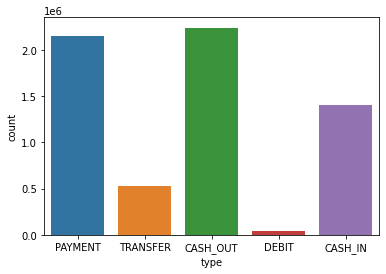

In [10]:
import seaborn as sns
sns.countplot('type',data=train)

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='type', ylabel='count'>

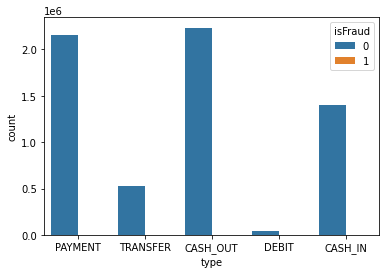

In [11]:
sns.countplot('type',hue="isFraud",data=train)

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='type', ylabel='count'>

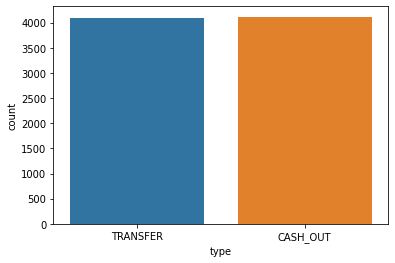

In [12]:
sns.countplot('type',data=train[train['isFraud']==1])

Since only Transfer and cash_out have chance of considered as Fraud, we combine them

In [13]:
train['type']=np.where((train['type']=="TRANSFER") | (train['type']=="CASH_OUT") ,1,0)
train.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,0,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,0,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,0,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


EDA for Amount COlumn

<AxesSubplot:xlabel='isFraud', ylabel='amount'>

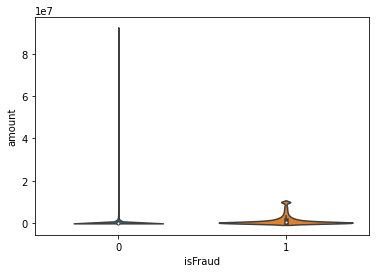

In [14]:
import matplotlib.pyplot as plt
sns.violinplot(x='isFraud',y='amount',data=train)


/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


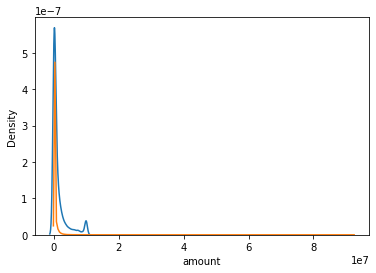

In [15]:
sns.distplot(train[train["isFraud"]==1]['amount'], hist=False, kde=True)
sns.distplot(train[train["isFraud"]==0]['amount'], hist=False, kde=True)
plt.show()


Needed to scale it and outliers are necessary 

EDA of name_org

In [16]:
len(np.unique(train['nameOrig']))

6353307

In [17]:
train['name_org']=[x[0] for x in train['nameOrig'] ]
train['name_org'].value_counts()

C    6362620
Name: name_org, dtype: int64

Name of all the origin account for the transactions are from customers, so we can remove considering the number of unique values

In [18]:
train=train.drop(['name_org',"nameOrig"],axis=1)

EDA for oldbalanceOrg

<AxesSubplot:xlabel='isFraud', ylabel='oldbalanceOrg'>

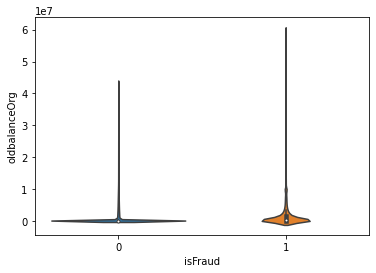

In [19]:
sns.violinplot(x='isFraud',y='oldbalanceOrg',data=train)


/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


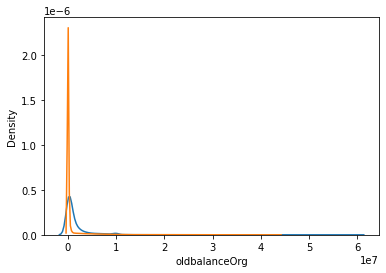

In [20]:
sns.distplot(train[train["isFraud"]==1]['oldbalanceOrg'], hist=False, kde=True)
sns.distplot(train[train["isFraud"]==0]['oldbalanceOrg'], hist=False, kde=True)
plt.show()


We can scale the value at the end 

For column newbalanceOrig

<AxesSubplot:xlabel='isFraud', ylabel='newbalanceOrig'>

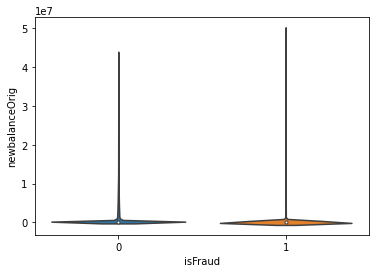

In [21]:
sns.violinplot(x='isFraud',y='newbalanceOrig',data=train)


/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


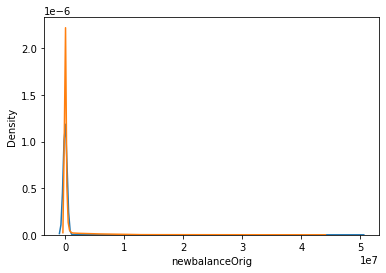

In [22]:
sns.distplot(train[train["isFraud"]==1]['newbalanceOrig'], hist=False, kde=True)
sns.distplot(train[train["isFraud"]==0]['newbalanceOrig'], hist=False, kde=True)
plt.show()


In [23]:
train['name_des']=[x[0] for x in train['nameDest'] ]
train['name_des'].value_counts()

C    4211125
M    2151495
Name: name_des, dtype: int64

<AxesSubplot:xlabel='isFraud', ylabel='count'>

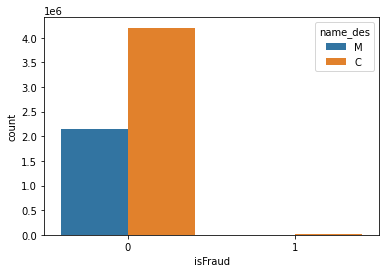

In [24]:
sns.countplot(x='isFraud',hue='name_des',data=train)

The New balance origin account has both customer and merchandise, Only customer account shows the chance of fraud transaction. Therefore better to have the 

In [25]:
train=train.drop(['nameDest'],axis=1)

IsFraud and IsFlagged

<AxesSubplot:xlabel='isFraud', ylabel='count'>

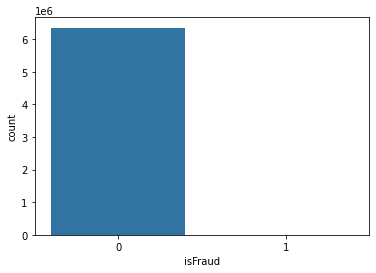

In [26]:
sns.countplot(x='isFraud',data=train)

In [27]:
train['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='isFlaggedFraud', ylabel='count'>

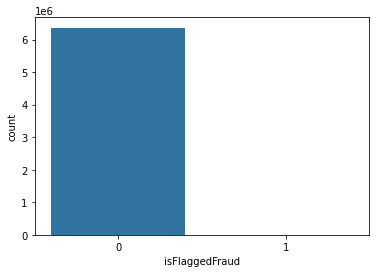

In [28]:
sns.countplot('isFlaggedFraud',data=train)

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='isFlaggedFraud', ylabel='count'>

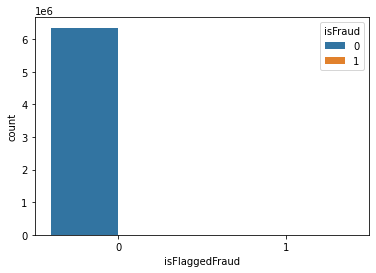

In [29]:
sns.countplot('isFlaggedFraud',hue='isFraud',data=train)

In [30]:
train.groupby(['isFraud','isFlaggedFraud']).count()

type   amount  oldbalanceOrg  newbalanceOrig  \
isFraud isFlaggedFraud                                                    
0       0               6354407  6354407        6354407         6354407   
1       0                  8197     8197           8197            8197   
        1                    16       16             16              16   

                        oldbalanceDest  newbalanceDest  name_des  
isFraud isFlaggedFraud                                            
0       0                      6354407         6354407   6354407  
1       0                         8197            8197      8197  
        1                           16              16        16

In [31]:
train=train.drop(['isFlaggedFraud'],axis=1)

Pre Processing

Scale all the continuous variables and use standardscalar since shape of distribution is necessary

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train[['amount']]=scaler.fit_transform(train[['amount']])
train[['oldbalanceOrg']]=scaler.fit_transform(train[['oldbalanceOrg']])
train[['newbalanceOrig']]=scaler.fit_transform(train[['newbalanceOrig']])
train[['oldbalanceDest']]=scaler.fit_transform(train[['oldbalanceDest']])
train[['newbalanceDest']]=scaler.fit_transform(train[['newbalanceDest']])


In [33]:
cols_to_transform=['name_des']
dummies = pd.get_dummies(train[cols_to_transform])
train = pd.concat([train, dummies], axis=1)

# drop the original categorical columns
train.drop(cols_to_transform, axis=1, inplace=True)


In [34]:
y=train['isFraud']
x=train.drop(['isFraud'],axis=1)


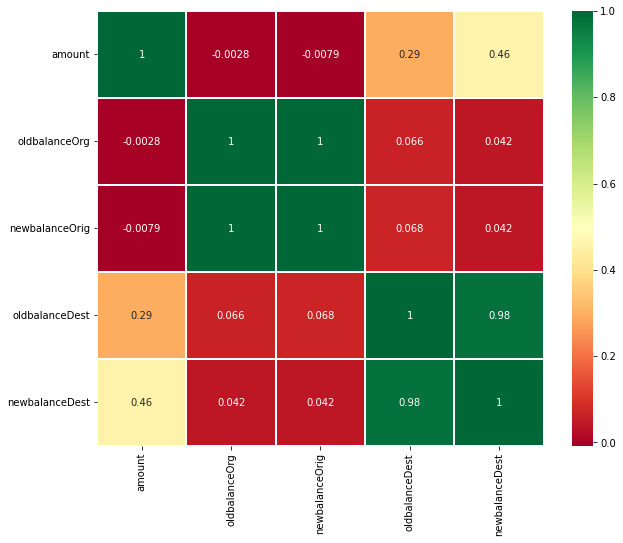

In [35]:
sns.heatmap(x[['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']].corr(),annot=True,cmap='RdYlGn',linewidths=0.2) 
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()


In [36]:
x=x.drop(["oldbalanceDest","oldbalanceOrg"],axis=1)

In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state = 0)


In [38]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
x_train, y_train = sm.fit_resample(x_train, y_train)

In [39]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(x_train, y_train)
y_pred=lg.predict_proba(x_test)

In [40]:

y_pred_val=[]
for i in y_pred:
  if(i[1]>0.4):
    y_pred_val.append(1)
  else:
    y_pred_val.append(0)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_val))

              precision    recall  f1-score   support

           0       1.00      0.61      0.76   1588628
           1       0.00      0.98      0.01      2027

    accuracy                           0.61   1590655
   macro avg       0.50      0.79      0.38   1590655
weighted avg       1.00      0.61      0.76   1590655



In [41]:
 from sklearn.metrics import confusion_matrix
 confusion_matrix(y_test, y_pred_val)

array([[973469, 615159],
       [    47,   1980]])

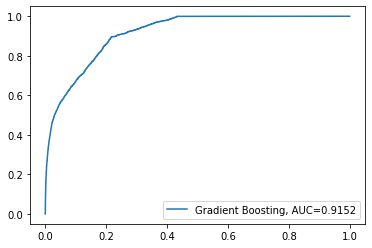

In [42]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred[:,1])
auc = round(metrics.roc_auc_score(y_test, y_pred[:,1]), 4)
plt.plot(fpr,tpr,label="Gradient Boosting, AUC="+str(auc))

#add legend
plt.legend()

In [43]:
from xgboost import XGBClassifier
xg = XGBClassifier()
xg.fit(x_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [44]:
y_pred=xg.predict_proba(x_test)

In [45]:
y_pred_val=[]
for i in y_pred:
  if(i[1]>0.6):
    y_pred_val.append(1)
  else:
    y_pred_val.append(0)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_val))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97   1588628
           1       0.02      0.78      0.03      2027

    accuracy                           0.94   1590655
   macro avg       0.51      0.86      0.50   1590655
weighted avg       1.00      0.94      0.97   1590655



In [46]:
 from sklearn.metrics import confusion_matrix
 confusion_matrix(y_test, y_pred_val)

array([[1491284,   97344],
       [    450,    1577]])

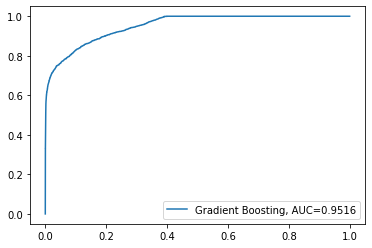

In [47]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred[:,1])
auc = round(metrics.roc_auc_score(y_test, y_pred[:,1]), 4)
plt.plot(fpr,tpr,label="Gradient Boosting, AUC="+str(auc))

#add legend
plt.legend()

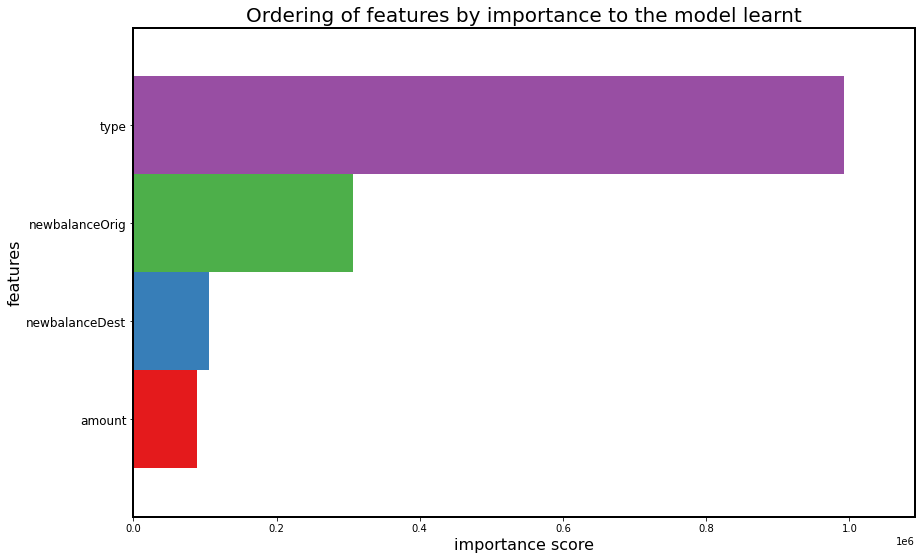

In [48]:
from xgboost import plot_importance, to_graphviz
fig = plt.figure(figsize = (14, 9))
ax = fig.add_subplot(111)

colours = plt.cm.Set1(np.linspace(0, 1, 9))

ax = plot_importance(xg, height = 1, color = colours, grid = False, \
                     show_values = False, importance_type = 'cover', ax = ax);
for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(2)
        
ax.set_xlabel('importance score', size = 16);
ax.set_ylabel('features', size = 16);
ax.set_yticklabels(ax.get_yticklabels(), size = 12);
ax.set_title('Ordering of features by importance to the model learnt', size = 20);

In [49]:
from sklearn.tree import DecisionTreeClassifier
dec = DecisionTreeClassifier()
dec.fit(x_train, y_train)
y_pred=dec.predict_proba(x_test)

In [50]:
y_pred_val=[]
for i in y_pred:
  if(i[1]>0):
    y_pred_val.append(1)
  else:
    y_pred_val.append(0)

In [51]:
 from sklearn.metrics import confusion_matrix
 confusion_matrix(y_test, y_pred_val)

array([[1505565,   83063],
       [    737,    1290]])

In [52]:
 from sklearn.metrics import classification_report
 print(classification_report(y_test, y_pred_val))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97   1588628
           1       0.02      0.64      0.03      2027

    accuracy                           0.95   1590655
   macro avg       0.51      0.79      0.50   1590655
weighted avg       1.00      0.95      0.97   1590655



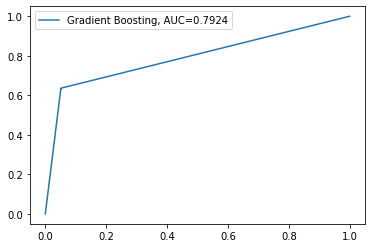

In [53]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred[:,1])
auc = round(metrics.roc_auc_score(y_test, y_pred[:,1]), 4)
plt.plot(fpr,tpr,label="Gradient Boosting, AUC="+str(auc))

#add legend
plt.legend()

In [54]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(x_train, y_train)

KNeighborsClassifier()

In [55]:
y_pred=neigh.predict_proba(x_test)

In [56]:
y_pred_val=[]
for i in y_pred:
  if(i[1]>0.1):
    y_pred_val.append(1)
  else:
    y_pred_val.append(0)

In [57]:
 from sklearn.metrics import confusion_matrix
 confusion_matrix(y_test, y_pred_val)

array([[1431994,  156634],
       [    535,    1492]])

In [58]:
 from sklearn.metrics import classification_report
 print(classification_report(y_test, y_pred_val))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95   1588628
           1       0.01      0.74      0.02      2027

    accuracy                           0.90   1590655
   macro avg       0.50      0.82      0.48   1590655
weighted avg       1.00      0.90      0.95   1590655



We can Conclude that Xgboost algorithm is better considering the F1 Score and accuracy